In [4]:
import pandas as pd

import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster

In [14]:
 ECO_exit =  pd.read_excel('../DATA/TEIS-NSS Project Data 10-2022.xlsx', 
                                 sheet_name='ECO with Exit21-22')


In [15]:
ECO_exit.head()


,DISTRICT,CHILD_ID,ECO_Entry_DATE,Ent SOCIAL_SCALE,Ent KNOWLEDGE_SCALE,Ent APPROPRIATE_ACTION_SCALE,ECO_Exit_DATE,Exit SOCIAL_SCALE,Exit KNOWLEDGE_SCALE,Exit APPROPRIATE_ACTION_SCALE,...,OC2 Data Check,OC3 - a,OC3 - b,OC3 - c,OC3 - d,OC3 - e,OC3 Data Check,Days btw Initial and Exit,Days btw I-IFSP to Exit ECO,Days btw I-IFSP to entry ECO
0,ET,500335.0,2021-04-23,5.0,3.0,4.0,2021-10-23,6.0,3.0,4.0,...,1.0,NaN,1.0,NaN,NaN,NaN,1.0,206.0,183.0,0.0
1,ET,479453.0,2020-03-23,7.0,7.0,7.0,2021-08-19,7.0,7.0,7.0,...,1.0,NaN,NaN,NaN,NaN,1.0,1.0,704.0,514.0,0.0
2,ET,510663.0,NaT,NaN,NaN,NaN,NaT,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,0.0,115.0,-44483.0,-44483.0
3,ET,452482.0,2019-01-31,2.0,3.0,3.0,2021-11-22,5.0,3.0,5.0,...,1.0,NaN,NaN,1.0,NaN,NaN,1.0,1053.0,1026.0,0.0
4,ET,506507.0,NaT,NaN,NaN,NaN,NaT,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,0.0,159.0,-44434.0,-44434.0


In [22]:
 Timeline =  pd.read_excel('../DATA/TEIS-NSS Project Data 10-2022.xlsx', 
                                 sheet_name='Elig Timeline Rpt 2018-2022')

In [23]:
 Timeline.head()

,District,Child ID,Child Status,Child Phase,Init. IFSP Due Date,IFSP Due Date,IFSP Late Reason,Active Ref. Date,Parent Consent/Intake Date,Date Dev. Evaluator Rec'd. Ref.,...,# Days Parent Consent to Dev. Eval.,# Days Dev. Evaluator Assigned to Dev. Eval.,1st Date Requested to Receipt of Med. Records,# Days Dev. Eval. to Elig. Det.,# Days Ref. to Elig. Det.,Init. Elig. Decision,Init. Elig. Category,Init. Elig. Det. Date,Exit Date,Exit Reason
0,ET,453926,Inactive,IFSP,2019-03-04,2019-03-27,System,2019-01-18,2019-02-04,2019-01-22 00:00:00,...,17.0,30.0,NaN,4.0,38.0,Eligible,Developmental Evaluation,2019-02-25,2020-01-11,618 - Part B eligible
1,ET,431729,Inactive,IFSP,2018-10-26,2018-10-26,NaN,2018-09-11,2018-09-25,2018-09-12 00:00:00,...,0.0,13.0,NaN,6.0,20.0,Eligible,"Diagnosed Condition, Developmental Evaluation",2018-10-01,2020-12-11,618 - Part B eligibility not determined
2,ET,462474,Inactive,IFSP,2019-06-28,2019-06-14,NaN,2019-05-14,2019-05-30,2019-05-15 00:00:00,...,0.0,15.0,0.0,1.0,17.0,Eligible,Developmental Evaluation,2019-05-31,2020-11-12,618 - Part B eligibility not determined
3,ET,446841,Inactive,Eligibility,2018-11-23,NaT,NaN,2018-10-09,2018-10-25,2018-10-11 00:00:00,...,0.0,14.0,NaN,1.0,17.0,Eligible,Diagnosed Condition,2018-10-26,2020-08-12,Parent decline
4,ET,459629,Inactive,IFSP,2019-05-16,2019-04-24,NaN,2019-04-01,2019-04-10,2019-04-02 00:00:00,...,0.0,8.0,0.0,2.0,11.0,Eligible,Developmental Evaluation,2019-04-12,2019-09-26,618 - Parent withdraw


In [20]:

pd.DataFrame(ECO_exit['Exit Reason'].value_counts(dropna = False))

,Exit Reason
Parent decline,12725
Ineligible for Part C,10340
Unable to contact,8748
NaN,8154
618 - Parent withdraw,7111
618 - Part B eligibility not determined,6715
618 - Part B eligible,5508
618 - Attempts to contact unsuccessful,2721
No meeting occurred,1920
618 - Moved out of state,1052


In [21]:
pd.DataFrame(ECO_exit['District'].value_counts(dropna = False))

,District
GN,11854
ET,11754
MD,10189
SC,9198
FT,6273
SE,5619
UC,5492
NW,3760
SW,3471


TypeError: 'value' must be an instance of str or bytes, not a float

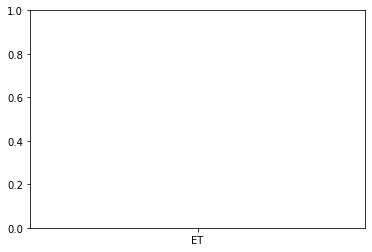

In [28]:
ECO_exit.plot.scatter(x='District', y='Exit Reason',title="Higher exit reason")
plt.show(block=True)